# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [5]:
# your code here
a = X[35]
a

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

In [6]:
# your code here
import matplotlib.pyplot as plt
import matplotlib

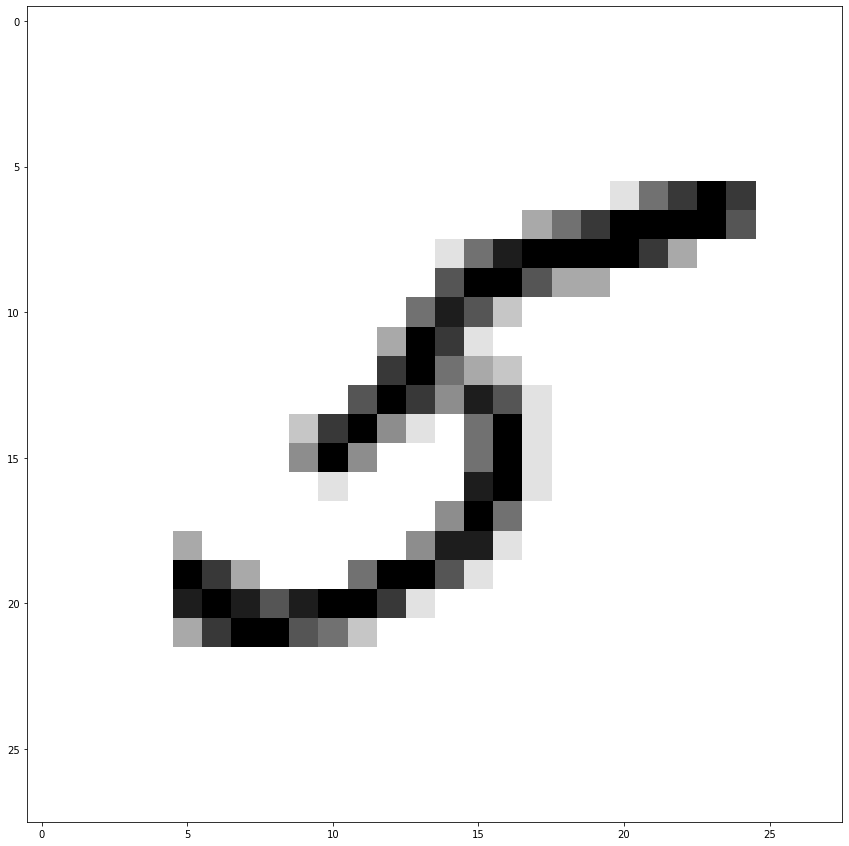

In [7]:
X_digit_image= a.reshape(28,28)
plt.figure(figsize=(15, 15))
plt.imshow(X_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [8]:
# your code here
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [9]:
# your code here

X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [10]:
# your code here
import numpy as np

In [11]:
y5 = np.where(y == "5", 1, 0)
y5_train, y5_test = y5[:60000], y5[60000:]

In [12]:
y_train_5 = y5[:60000]
y_test_5 = y5[60000:]
y5

array([1, 0, 0, ..., 0, 1, 0])

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [15]:
# your code here
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train, y5_train)

C:\Users\yago\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Does the classifier predict correctly the 35th digit we picked before?

In [18]:
# your code here
y5_pred = model.predict(X)
print(y5_pred[35])

1


In [ ]:
# your comments here
#yes, the prediction is correct

#### The 36000th value is a 9. Check if it was correctly predicted.

In [19]:
# your code here
print(y5_pred[36000])

0


In [ ]:
# your comments here
#yes

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [20]:
# Libraries
from sklearn.base import BaseEstimator

In [21]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [23]:
# your code here
y_never5_pred = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
# your code here
from sklearn.metrics import precision_score

In [28]:
confusion_never5 = confusion_matrix(y_test_5, y_never5_pred) 
f1_never5 = f1_score(y_test_5, y_never5_pred)
precision_never5 = precision_score(y_test_5, y_never5_pred)
recall_never5 = recall_score(y_test_5, y_never5_pred)

print(confusion_never5)
print(f1_never5)
print(precision_never5)
print(recall_never5)

[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [30]:
# your code here
from sklearn.metrics import roc_curve

In [35]:
roc_curve(y_test_5, y_never5_pred)

(array([0., 1.]), array([0., 1.]), array([1., 0.]))

#### Now find the roc_auc_score for each. 

In [37]:
# your code here
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_test_5, y_never5_pred)

0.5

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here